<head>
  <meta name="author" content="Orlando">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://www.orlandoalbarracin.com.br/phyton/mackenzie-logo.png" width=300, align="left">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->




In [189]:
# Bibliotecas

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# Lab ARIMA
Modelando uma série usando os modelos ARIMA

## Analisar a série diária do preço de um item numa loja online.

In [190]:
df1=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/preco_reais.xlsx")
df1.tail()

,dia,mês,ano,valor
496,12,5,2019,185.082191
497,13,5,2019,187.284509
498,14,5,2019,188.969031
499,15,5,2019,186.527867
500,16,5,2019,183.498871


In [191]:
# Arrumando as datas
import matplotlib.dates as mdates

index_dates1 = pd.date_range(start='01/1/2018', end='16/5/2019', freq='D')
df1.index=index_dates1
df1

,dia,mês,ano,valor
2018-01-01,1,1,2018,200.000000
2018-01-02,2,1,2018,204.491204
2018-01-03,3,1,2018,208.368338
2018-01-04,4,1,2018,211.412653
2018-01-05,5,1,2018,211.871225
...,...,...,...,...
2019-05-12,12,5,2019,185.082191
2019-05-13,13,5,2019,187.284509
2019-05-14,14,5,2019,188.969031
2019-05-15,15,5,2019,186.527867


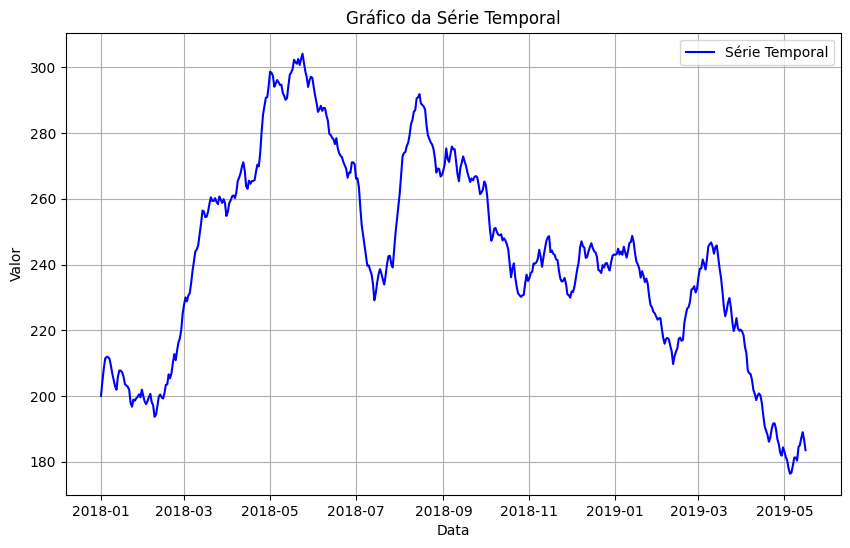

In [192]:
# Graficar a série
# Plotando a série temporal
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['valor'], label='Série Temporal', color='blue')
plt.title('Gráfico da Série Temporal')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()



In [193]:
# Ver a função ACF
from statsmodels.graphics.tsaplots import plot_acf

# Calcular a ACF
acf_result = sm.tsa.acf(df1['valor'], nlags=len(df1)-1)



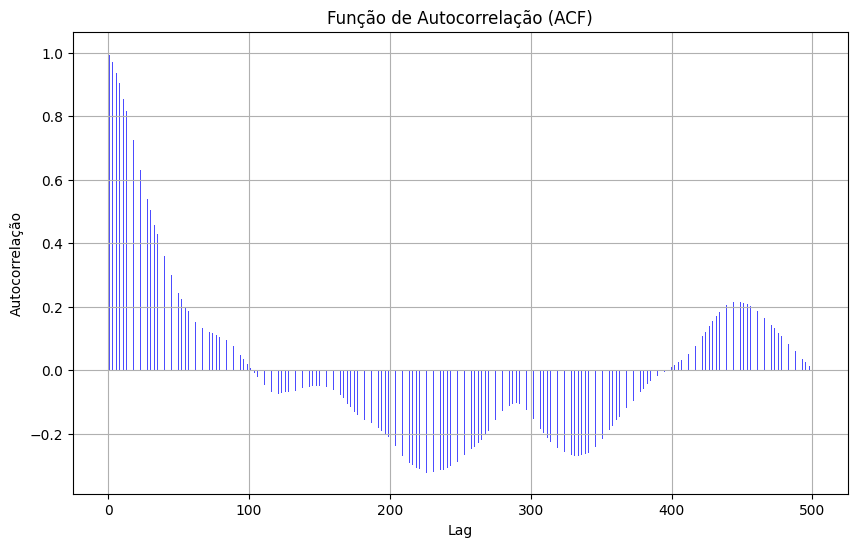

In [194]:
# Plotar a Função de Autocorrelação (ACF)
plt.figure(figsize=(10, 6))
plt.bar(range(len(acf_result)), acf_result, width=0.2, color='blue', alpha=0.7)
plt.title('Função de Autocorrelação (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()

In [195]:
# Ver os valores diferenciados

# Calculando a primeira diferenciação
df1_diff1 = df1['valor'].diff()


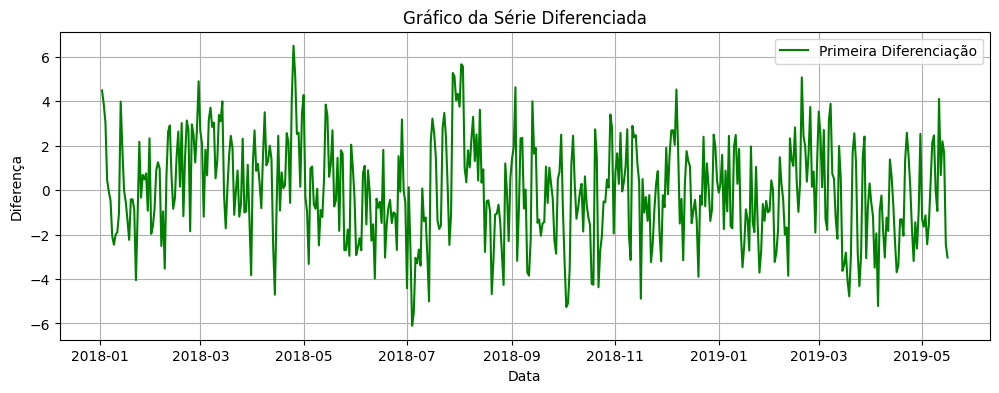

In [196]:
# Plotando a série diferenciada
plt.figure(figsize=(12, 4))
plt.plot(df1_diff1.index, df1_diff1, label='Primeira Diferenciação', color='green')
plt.title('Gráfico da Série Diferenciada')
plt.xlabel('Data')
plt.ylabel('Diferença')
plt.legend()
plt.grid(True)
plt.show()

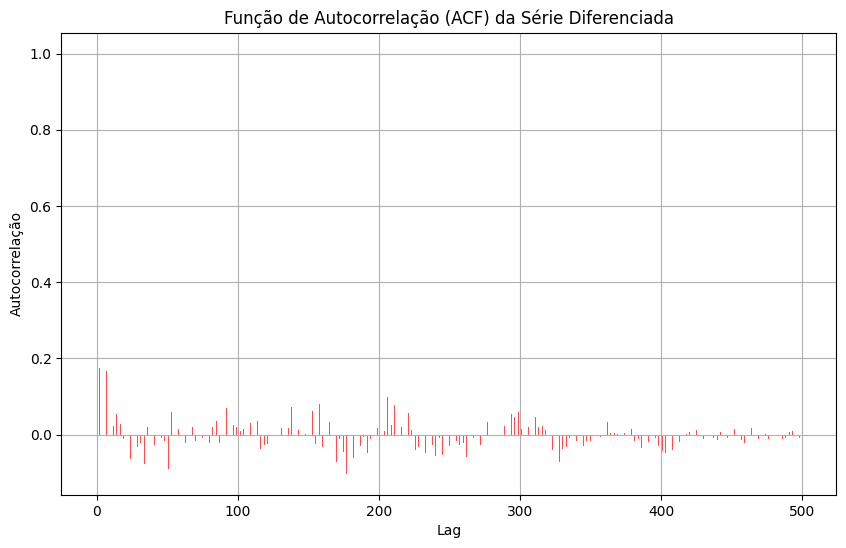

In [197]:
# Calculando a primeira diferenciação
df1_diff1 = df1['valor'].diff().dropna()  # Removendo valores NaN resultantes da diferenciação

# Calculando a ACF da série diferenciada
acf_result_diff1 = sm.tsa.acf(df1_diff1, nlags=len(df1_diff1)-1)

# Plotando a Função de Autocorrelação (ACF) da série diferenciada
plt.figure(figsize=(10, 6))
plt.bar(range(len(acf_result_diff1)), acf_result_diff1, width=0.2, color='red', alpha=0.7)
plt.title('Função de Autocorrelação (ACF) da Série Diferenciada')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()



In [198]:
# PACF da série diferencia
from statsmodels.graphics.tsaplots import plot_pacf


In [199]:
# Create Training and Test (O que é isso?)
t=  int(len(df1) * 0.2)

train = df1.valor[:(len(df1)-t)]
test = df1.valor[(len(df1)-t):]


In [200]:
# Exibindo os tamanhos dos conjuntos de treinamento e teste
print("Tamanho do Conjunto de Treinamento:", len(train))
print("Tamanho do Conjunto de Teste:", len(test))

Tamanho do Conjunto de Treinamento: 401
Tamanho do Conjunto de Teste: 100


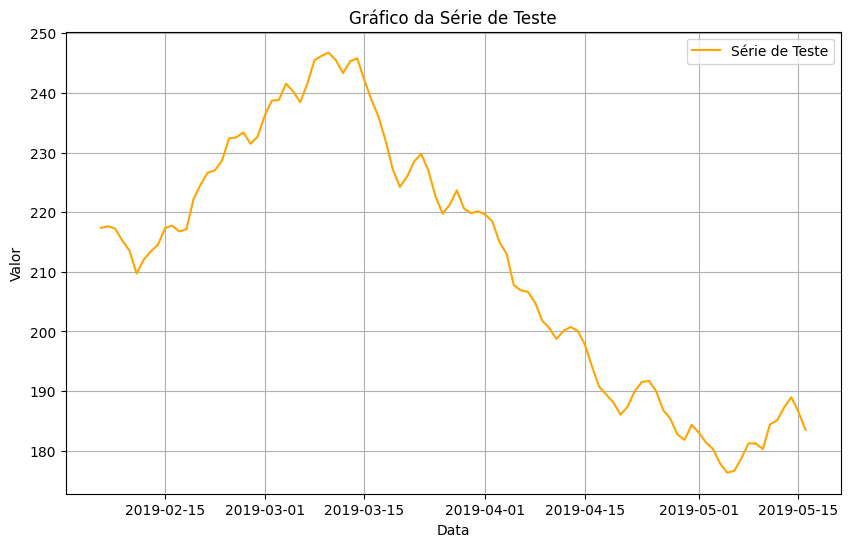

In [201]:
# Ver a série teste
# Plotando a série de teste
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Série de Teste', color='orange')
plt.title('Gráfico da Série de Teste')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


In [202]:
# Valores de AIC
import itertools

for i, j in itertools.product(range(7), range(7)):
  print("AIC do modelo","ARIMA(",i,", 1 ,",j,"):",
        round(ARIMA(train, order=(i, 1, j),
                    enforce_stationarity=True,
                    enforce_invertibility=True).fit(method_kwargs={'maxiter':700}).aic,4))

AIC do modelo ARIMA( 0 , 1 , 0 ): 1785.5601
AIC do modelo ARIMA( 0 , 1 , 1 ): 1704.0959
AIC do modelo ARIMA( 0 , 1 , 2 ): 1693.5467
AIC do modelo ARIMA( 0 , 1 , 3 ): 1694.7553
AIC do modelo ARIMA( 0 , 1 , 4 ): 1692.369
AIC do modelo ARIMA( 0 , 1 , 5 ): 1690.7628
AIC do modelo ARIMA( 0 , 1 , 6 ): 1673.2164
AIC do modelo ARIMA( 1 , 1 , 0 ): 1689.5418
AIC do modelo ARIMA( 1 , 1 , 1 ): 1691.2984
AIC do modelo ARIMA( 1 , 1 , 2 ): 1687.6588
AIC do modelo ARIMA( 1 , 1 , 3 ): 1687.9143
AIC do modelo ARIMA( 1 , 1 , 4 ): 1687.648
AIC do modelo ARIMA( 1 , 1 , 5 ): 1689.5236
AIC do modelo ARIMA( 1 , 1 , 6 ): 1669.3976
AIC do modelo ARIMA( 2 , 1 , 0 ): 1691.3337
AIC do modelo ARIMA( 2 , 1 , 1 ): 1693.2538
AIC do modelo ARIMA( 2 , 1 , 2 ): 1688.5422
AIC do modelo ARIMA( 2 , 1 , 3 ): 1682.6813
AIC do modelo ARIMA( 2 , 1 , 4 ): 1682.713
AIC do modelo ARIMA( 2 , 1 , 5 ): 1684.3017
AIC do modelo ARIMA( 2 , 1 , 6 ): 1670.8528
AIC do modelo ARIMA( 3 , 1 , 0 ): 1692.7177
AIC do modelo ARIMA( 3 , 1 , 1 ): 1

### O modelo ARIMA (1,1,6) apresentou o menor valor de AIC

AIC do modelo ARIMA( 1 , 1 , 6 ): 1669.3976

In [203]:
# Ajustando o modelo ARIMA

model=ARIMA(train, order=(1, 1, 6))
print(model.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                  valor   No. Observations:                  401
Model:                 ARIMA(1, 1, 6)   Log Likelihood                -826.699
Date:                Sun, 03 Dec 2023   AIC                           1669.398
Time:                        18:06:43   BIC                           1701.329
Sample:                    01-01-2018   HQIC                          1682.043
                         - 02-05-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5286      0.147      3.608      0.000       0.241       0.816
ma.L1         -0.0441      0.147     -0.299      0.765      -0.333       0.245
ma.L2         -0.0839      0.085     -0.984      0.3

In [204]:
# Ver os resíduos
residuos=model.fit().resid[1:]
residuos

2018-01-02    4.490729
2018-01-03    1.775514
2018-01-04    1.344337
2018-01-05   -0.913697
2018-01-06   -0.408209
                ...   
2019-02-01    1.516198
2019-02-02   -0.423892
2019-02-03   -2.814526
2019-02-04   -1.099014
2019-02-05   -0.561005
Freq: D, Length: 400, dtype: float64

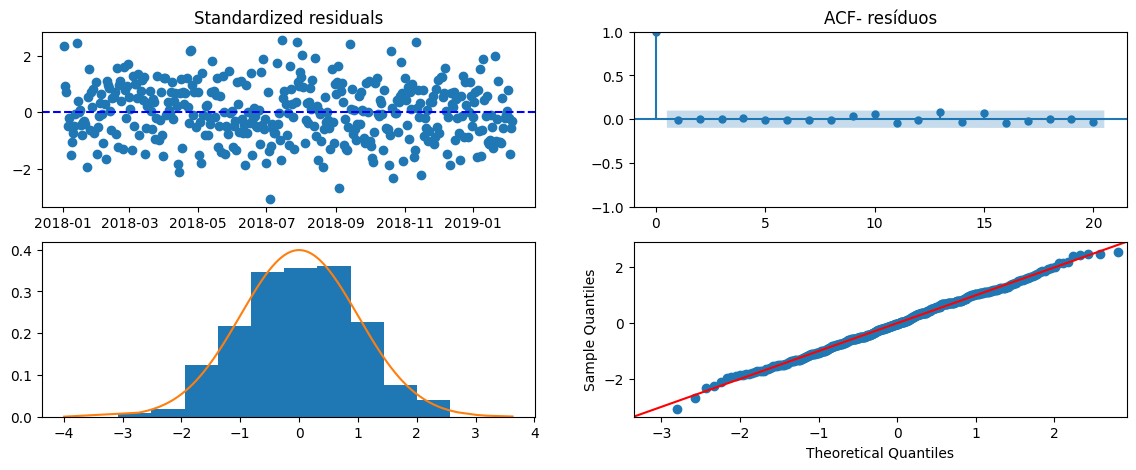

In [205]:
#@markdown Análise de resíduos

# Resíduos
res=model.fit().resid[1:]
res_standard=(res-res.mean())/np.sqrt(res.var())
ts=df1

# Gráficos do ajuste

import scipy.stats as stats
import statsmodels.api as sm

train_size=len(train)

fig,axs = plt.subplots(2, 2,figsize=(14,5))

axs[0,0].scatter(ts.index[1:train_size], res_standard[0:train_size])
axs[0,0].axhline(y=0, color='b', linestyle='--')
axs[0,0].set_title('Standardized residuals')

x=plot_acf(res, lags=20, ax=axs[0,1], title="ACF- resíduos");

axs[1,0].hist(res_standard[1:train_size], density=True);
x=np.sort(np.random.normal(0, 1, 1000))
axs[1,0].plot(x, stats.norm.pdf(x, 0, 1))
x1=sm.qqplot(res_standard[1:train_size], line ='45', ax=axs[1,1])


In [206]:
# Fazendo previsões para os próximos 30 dias
resultado = model.fit()

previsoes = resultado.predict(start=len(train), end=len(train) + 29, typ='levels')

# Criando um DataFrame para armazenar as datas e as previsões
datas_previstas = pd.date_range(start=test.index[-1], periods=31)[1:]  # Começando a partir do próximo dia após o último dia no conjunto de teste
df_previsoes = pd.DataFrame({'Data': datas_previstas, 'Previsao': previsoes.values})

# Exibindo as previsões
print(df_previsoes)



         Data    Previsao
0  2019-05-17  215.189062
1  2019-05-18  215.275344
2  2019-05-19  215.206063
3  2019-05-20  214.362121
4  2019-05-21  213.606964
5  2019-05-22  213.049036
6  2019-05-23  212.754104
7  2019-05-24  212.598197
8  2019-05-25  212.515782
9  2019-05-26  212.472215
10 2019-05-27  212.449185
11 2019-05-28  212.437011
12 2019-05-29  212.430575
13 2019-05-30  212.427173
14 2019-05-31  212.425375
15 2019-06-01  212.424424
16 2019-06-02  212.423922
17 2019-06-03  212.423656
18 2019-06-04  212.423516
19 2019-06-05  212.423442
20 2019-06-06  212.423402
21 2019-06-07  212.423382
22 2019-06-08  212.423371
23 2019-06-09  212.423365
24 2019-06-10  212.423362
25 2019-06-11  212.423360
26 2019-06-12  212.423359
27 2019-06-13  212.423359
28 2019-06-14  212.423359
29 2019-06-15  212.423358


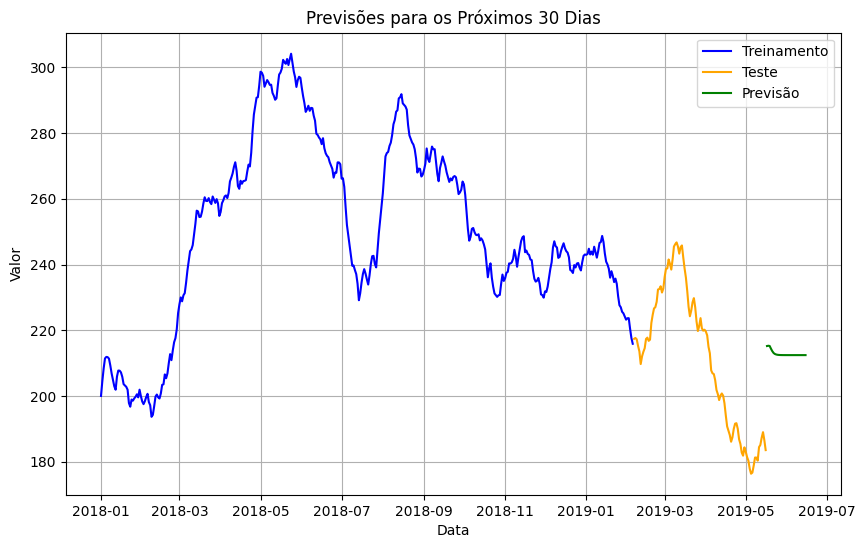

In [207]:
# Ver as previsões
h=100

# Plotando as previsões
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Treinamento', color='blue')
plt.plot(test.index, test.values, label='Teste', color='orange')
plt.plot(df_previsoes['Data'], df_previsoes['Previsao'], label='Previsão', color='green')
plt.title('Previsões para os Próximos 30 Dias')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [208]:
len(test.index)

100

In [209]:
forecast.predicted_mean

2019-02-06    215.189062
2019-02-07    215.275344
2019-02-08    215.206063
2019-02-09    214.362121
2019-02-10    213.606964
2019-02-11    213.049036
2019-02-12    212.754104
2019-02-13    212.598197
2019-02-14    212.515782
2019-02-15    212.472215
2019-02-16    212.449185
2019-02-17    212.437011
2019-02-18    212.430575
2019-02-19    212.427173
2019-02-20    212.425375
2019-02-21    212.424424
2019-02-22    212.423922
2019-02-23    212.423656
2019-02-24    212.423516
2019-02-25    212.423442
2019-02-26    212.423402
2019-02-27    212.423382
2019-02-28    212.423371
2019-03-01    212.423365
2019-03-02    212.423362
2019-03-03    212.423360
2019-03-04    212.423359
2019-03-05    212.423359
2019-03-06    212.423359
2019-03-07    212.423358
Freq: D, Name: predicted_mean, dtype: float64

In [210]:
#@markdown Previsões

h=100
forecast = model.fit().get_forecast(h)
forecast.predicted_mean

# Previsões com intervalos de confiança de 95%
fc_series = pd.Series(forecast.predicted_mean, index=test.index)
lower_series = pd.Series(forecast.conf_int(alpha = 0.05)["lower valor"], index=test.index)
upper_series = pd.Series(forecast.conf_int(alpha = 0.05)["upper valor"], index=test.index)

df_prev=pd.DataFrame({"Previsões":fc_series,
              "Limite Inferior IC 95%":lower_series,
              "Limite Superior IC 95%":upper_series})
df_prev



,Previsões,Limite Inferior IC 95%,Limite Superior IC 95%
2019-02-06,215.189062,211.446530,218.931595
2019-02-07,215.275344,208.576580,221.974109
2019-02-08,215.206063,206.078310,224.333817
2019-02-09,214.362121,203.226097,225.498144
2019-02-10,213.606964,200.676163,226.537764
...,...,...,...
2019-05-12,212.423358,126.000315,298.846401
2019-05-13,212.423358,125.532146,299.314570
2019-05-14,212.423358,125.066486,299.780230
2019-05-15,212.423358,124.603295,300.243421


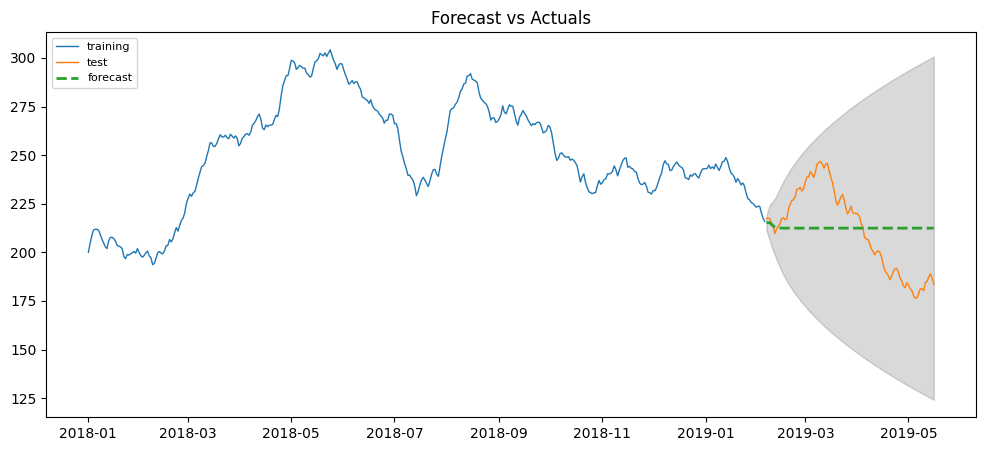

In [211]:
#@markdown Grafico

plt.figure(figsize=(12,5))

plt.plot(train, label='training',linestyle='solid',alpha=1,lw=1)
plt.plot(test, label='test',linestyle='solid',alpha=1,lw=1)
plt.plot(fc_series, label='forecast',linestyle='dashed',alpha=1,lw=2)
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

plt.show()


In [212]:
# Boas previsões?

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(forecast.predicted_mean, test.values)

{'mape': 0.08949480876592561,
 'me': 0.8544220898490087,
 'mae': 18.4853873380295,
 'mpe': 0.01450609534661435,
 'rmse': 21.359033945687383}